In [22]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_pickle("../data/pickles/tepsr_wc120.pkl")

Let's have a look at the data

In [3]:
df.head()

,unit,sex,age,isced11,geo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,PC,T,Y20-64,ED0-2,AT,52.0,54.0,56.5,55.7,54.0,54.9,55.3,54.7,53.9,53.1,53.1,53.9,53.9,55.6,55.7
1,PC,T,Y20-64,ED0-2,BE,48.8,48.8,49.5,49.1,47.7,48.4,47.3,47.1,46.8,46.6,45.6,45.6,45.9,45.6,46.3
2,PC,T,Y20-64,ED0-2,BG,39.4,40.2,43.5,46.5,45.0,39.8,36.7,36.2,36.9,38.6,39.0,39.2,44.4,46.2,51.2
3,PC,T,Y20-64,ED0-2,CH,66.5,66.2,67.3,69.0,69.0,67.1,67.7,68.1,67.9,67.9,68.1,68.1,67.7,69.2,69.7
4,PC,T,Y20-64,ED0-2,CY,64.8,66.6,66.4,64.1,64.9,66.8,65.1,57.8,54.9,54.6,55.1,56.8,57.0,61.6,63.2


In [4]:
df["isced11"].unique()

array(['ED0-2', 'ED3_4', 'ED5-8'], dtype=object)

There are 3 types of education levels:
- ED0-2: Less than primary, primary and lower secundary education (level 0-2)
- ED3_4: Upper secondary and post-secundary non-tertiary education (level 3-4)
- ED5-8: Tertiary education (level 5-8)

In [5]:
df["geo"].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE', 'EL',
       'ES', 'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS',
       'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT',
       'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK'], dtype=object)

In [6]:
df["sex"].unique()

array(['T'], dtype=object)

Filter for Germany only

In [7]:
df_germany = df.loc[df["geo"] == "DE"]

In [8]:
df_germany.head()

,unit,sex,age,isced11,geo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,PC,T,Y20-64,ED0-2,DE,51.9,54.1,55.0,55.9,55.7,56.1,57.4,57.8,58.3,58.0,58.5,58.9,59.6,60.7,61.8
44,PC,T,Y20-64,ED3_4,DE,69.6,71.4,73.3,74.2,74.1,74.9,76.3,76.8,77.3,78.1,78.4,79.3,80.0,80.7,81.3
82,PC,T,Y20-64,ED5-8,DE,82.8,84.2,85.4,85.7,86.3,86.8,87.8,87.7,87.6,87.7,87.8,87.9,88.1,88.5,89.0


Only leave the columns that we use for this particular analysis: isced11 (education level) and year.
And transform the dataframe to a suitable format for plotting

In [9]:
df_germany = df_germany.drop(columns=["unit", "sex", "age", "geo"])

In [10]:
df_germany = df_germany.set_index("isced11")

In [11]:
df_germany

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
isced11,,,,,,,,,,,,,,,
ED0-2,51.9,54.1,55.0,55.9,55.7,56.1,57.4,57.8,58.3,58.0,58.5,58.9,59.6,60.7,61.8
ED3_4,69.6,71.4,73.3,74.2,74.1,74.9,76.3,76.8,77.3,78.1,78.4,79.3,80.0,80.7,81.3
ED5-8,82.8,84.2,85.4,85.7,86.3,86.8,87.8,87.7,87.6,87.7,87.8,87.9,88.1,88.5,89.0


In [12]:
df_germany = df_germany.T

In [13]:
df_germany

isced11,ED0-2,ED3_4,ED5-8
2005,51.9,69.6,82.8
2006,54.1,71.4,84.2
2007,55.0,73.3,85.4
2008,55.9,74.2,85.7
2009,55.7,74.1,86.3
2010,56.1,74.9,86.8
2011,57.4,76.3,87.8
2012,57.8,76.8,87.7
2013,58.3,77.3,87.6
2014,58.0,78.1,87.7


In [14]:
df_germany.reset_index(inplace=True)

In [15]:
df_germany

isced11,index,ED0-2,ED3_4,ED5-8
0,2005,51.9,69.6,82.8
1,2006,54.1,71.4,84.2
2,2007,55.0,73.3,85.4
3,2008,55.9,74.2,85.7
4,2009,55.7,74.1,86.3
5,2010,56.1,74.9,86.8
6,2011,57.4,76.3,87.8
7,2012,57.8,76.8,87.7
8,2013,58.3,77.3,87.6
9,2014,58.0,78.1,87.7


In [17]:
df_germany.rename(columns={"index":"year"}, inplace=True)

In [18]:
df_germany 

isced11,year,ED0-2,ED3_4,ED5-8
0,2005,51.9,69.6,82.8
1,2006,54.1,71.4,84.2
2,2007,55.0,73.3,85.4
3,2008,55.9,74.2,85.7
4,2009,55.7,74.1,86.3
5,2010,56.1,74.9,86.8
6,2011,57.4,76.3,87.8
7,2012,57.8,76.8,87.7
8,2013,58.3,77.3,87.6
9,2014,58.0,78.1,87.7


Plotting

ED0-2: Less than primary, primary and lower secundary education (level 0-2)

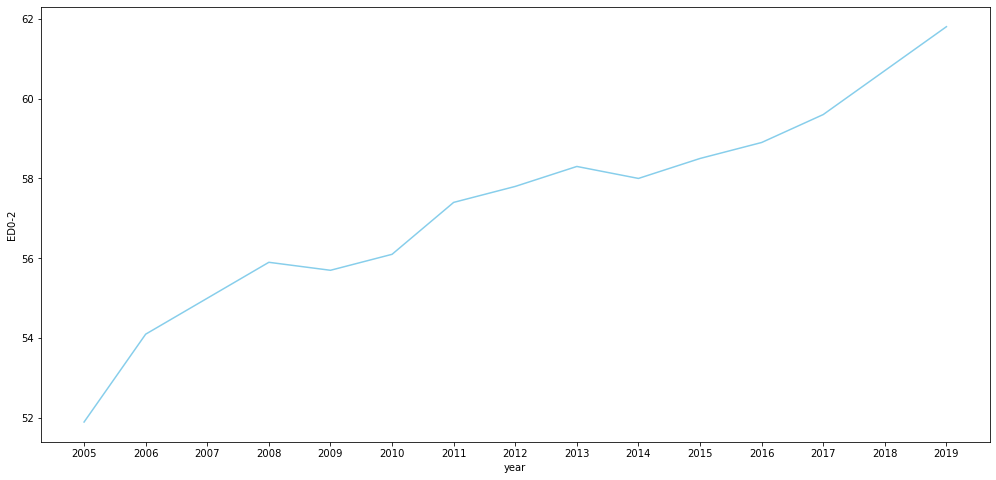

In [62]:
fig, ax = plt.pyplot.subplots(figsize=(17,8))

sns.lineplot(data=df_germany,
             x="year",
             y="ED0-2",
             color="skyblue");

ED3_4: Upper secondary and post-secundary non-tertiary education (level 3-4)

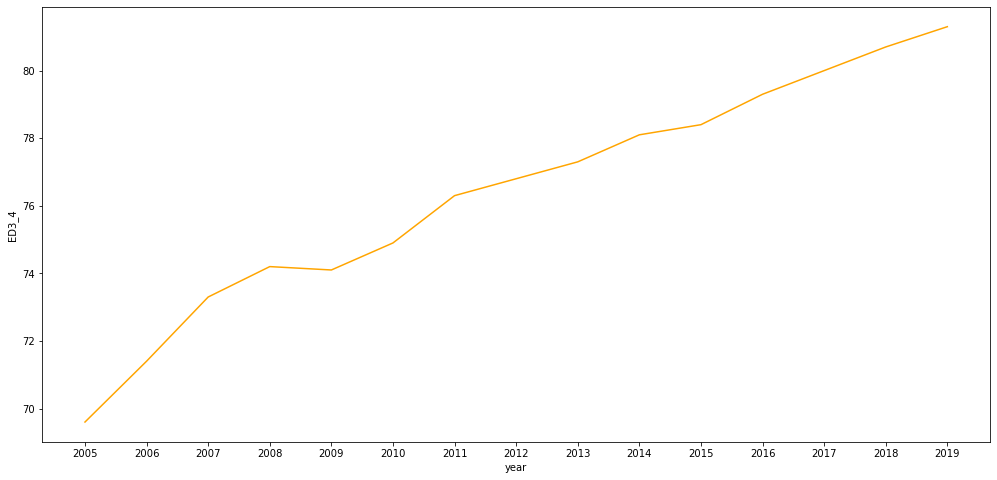

In [63]:
ig, ax = plt.pyplot.subplots(figsize=(17,8))

sns.lineplot(data=df_germany,
             x="year",
             y="ED3_4",
             color="orange");

ED5-8: Tertiary education (level 5-8)

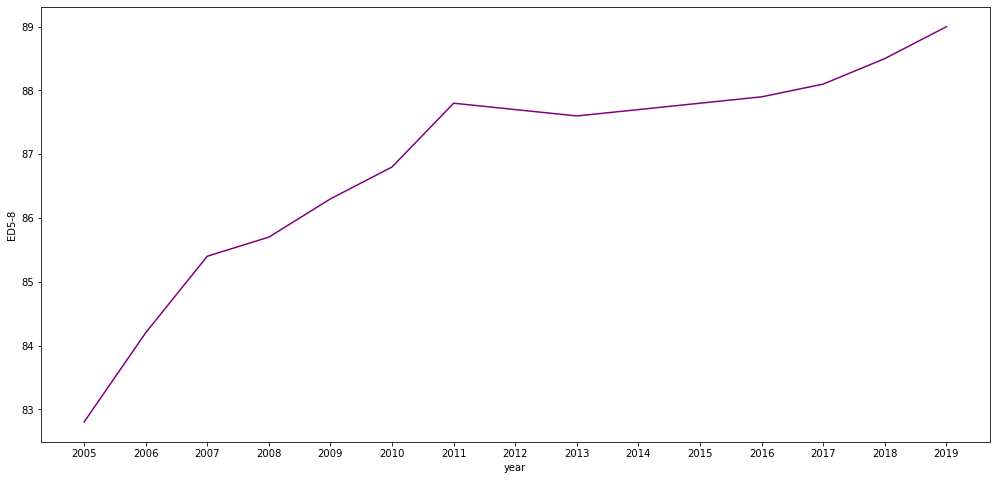

In [64]:
fig, ax = plt.pyplot.subplots(figsize=(17,8))

sns.lineplot(data=df_germany,
             x="year",
             y="ED5-8",
             color="purple");

All 3 education levels in 1 plot

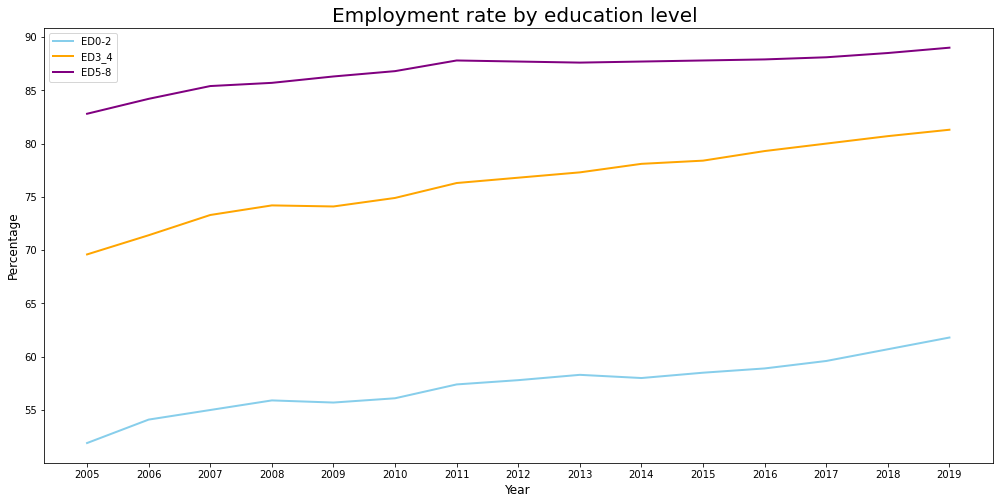

In [73]:
fig, ax = plt.pyplot.subplots(figsize=(17,8))

plt.pyplot.title("Employment rate by education level ", fontsize=20)
plt.pyplot.xlabel("Year", fontsize=12)
plt.pyplot.ylabel("Percentage", fontsize=12)
ax.plot("year", "ED0-2", data=df_germany, color='skyblue', linewidth=2, label="ED0-2")
ax.plot("year", "ED3_4", data=df_germany, color='orange', linewidth=2, label="ED3_4")
ax.plot("year", "ED5-8", data=df_germany, color='purple', linewidth=2, label="ED5-8")
plt.pyplot.legend()


People with a lower education level have the lowest employment rate, compared with medium and higher education. The gap between lower education and the other levels is larger than between medium and higher education. The employment rate of all three education levels is going up. It even looks like the gap between the medium and higher education levels are becoming smaller over time. 

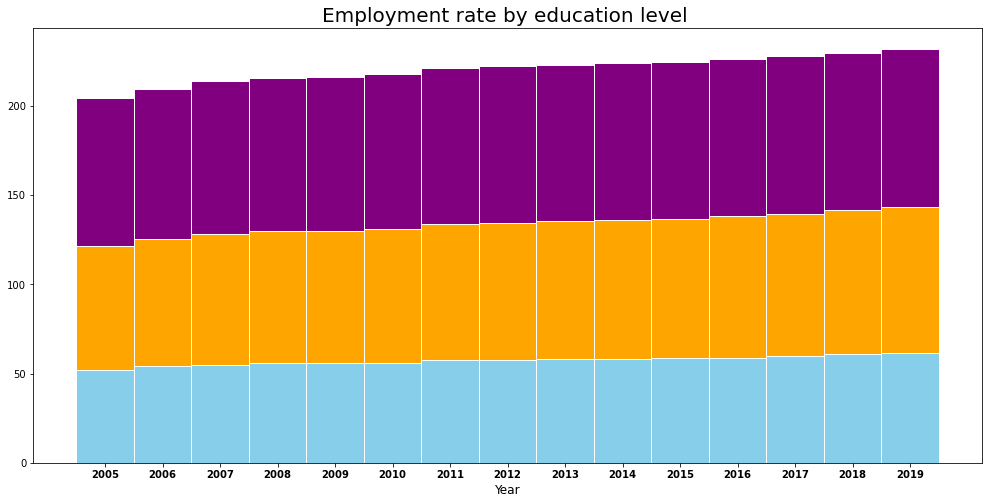

In [89]:
fig, ax = plt.pyplot.subplots(figsize=(17,8))

# Values of each group
bars1 = df_germany["ED0-2"]
bars2 = df_germany["ED3_4"]
bars3 = df_germany["ED5-8"]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
 
# Names of group and bar width
names = ['2005','2006','2007','2008','2009', '2010', '2011', 
         '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
barWidth = 1
 
plt.pyplot.title("Employment rate by education level ", fontsize=20)
# Create brown bars
plt.pyplot.bar(r, bars1, color='skyblue', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.pyplot.bar(r, bars2, bottom=bars1, color='orange', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.pyplot.bar(r, bars3, bottom=bars, color='purple', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.pyplot.xticks(r, names, fontweight='bold')
plt.pyplot.xlabel("Year",fontsize=12)
 
# Show graphic
plt.pyplot.show()
